# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.drop('_c39', inplace=True, axis=1)

In [8]:
df.shape

(1000, 39)

In [9]:
df[['police_report_available','collision_type']]

,police_report_available,collision_type
0,YES,Side Collision
1,?,?
2,NO,Rear Collision
3,NO,Front Collision
4,NO,?
...,...,...
995,?,Front Collision
996,?,Rear Collision
997,YES,Side Collision
998,YES,Rear Collision


In [10]:
# replacing ? with nan value
df_clean = df.replace({ "?": np.nan})
df_clean

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [11]:
df_clean[['police_report_available','collision_type']]

,police_report_available,collision_type
0,YES,Side Collision
1,NaN,NaN
2,NO,Rear Collision
3,NO,Front Collision
4,NO,NaN
...,...,...
995,NaN,Front Collision
996,NaN,Rear Collision
997,YES,Side Collision
998,YES,Rear Collision


In [15]:
insurance_claims = df_clean.copy()

In [19]:
selected_columns = ['months_as_customer', 'age', 'policy_state','policy_deductable','policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day','insured_zip','number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses','police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']

In [20]:
insurance_df = df[selected_columns].copy()

In [21]:
insurance_df.shape

(1000, 35)

In [22]:
# EDA Process
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [25]:
Gender_count = insurance_df.insured_sex.value_counts()

In [26]:
Hobbies_pct = insurance_df.insured_hobbies.value_counts()*100/insurance_df.insured_hobbies.count()

In [27]:
Profession_pct = insurance_df.insured_occupation.value_counts()*100/insurance_df.insured_occupation.count()

In [28]:
Auto_model = insurance_df.auto_model.value_counts().head(5)

In [29]:
Months_as_customer = pd.cut(insurance_df.months_as_customer,bins=[0,150,300,450],
                            labels=['Newly Enrolled','Short-Term','Long-Term Customer'])

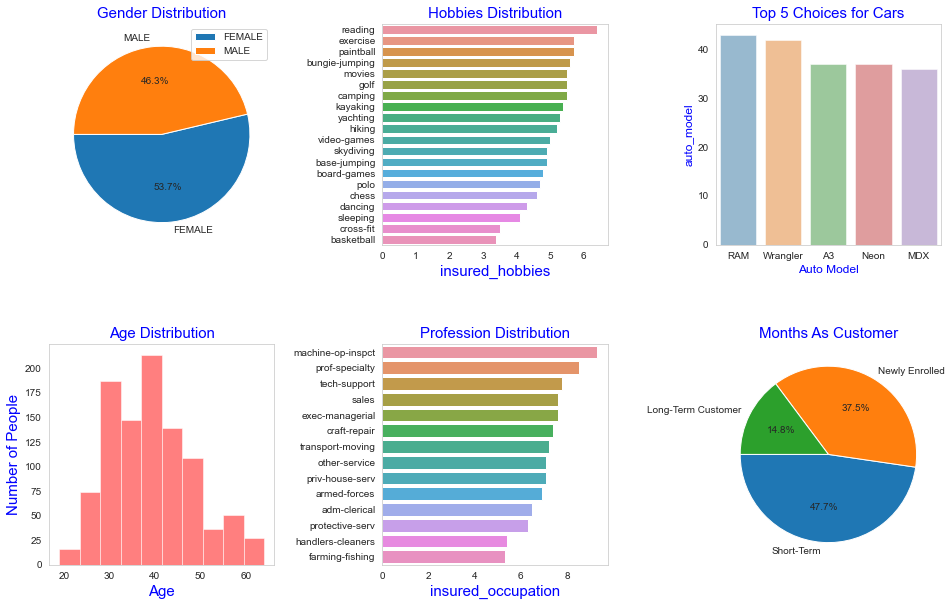

In [30]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
plt.tight_layout(pad=8)
plt.grid(False)
sns.set_style("whitegrid", {'axes.grid' : False})

axes[0,0].set_title('Gender Distribution',fontsize=15,color='blue')
axes[0,0].pie(insurance_df.insured_sex.value_counts(),labels=Gender_count.index,autopct='%1.1f%%',startangle=180)
axes[0,0].legend()

axes[0,1].set_xlabel('Number of People',fontsize=15)
axes[0,1].set_title('Hobbies Distribution',fontsize=15,color='blue')
axes[0,1].set_xlabel('Percentage',fontsize=15,color='blue')
axes[0,1].set_ylabel(None,color='blue')
sns.barplot(x=Hobbies_pct,y=Hobbies_pct.index,ax=axes[0,1]);

axes[0,2].set_title('Top 5 Choices for Cars',fontsize=15,color='blue')
axes[0,2].set_xlabel('Auto Model',fontsize=12,color='blue')
axes[0,2].set_ylabel('Count',fontsize=12,color='blue')
sns.barplot(x=Auto_model.index,y=Auto_model,ax=axes[0,2],alpha=0.5)

axes[1,0].hist(insurance_df.age,color='red',alpha=0.5);
axes[1,0].set_title('Age Distribution',fontsize=15,color='blue')
axes[1,0].set_xlabel('Age',fontsize=15,color='blue')
axes[1,0].set_ylabel('Number of People',fontsize=15,color='blue')

axes[1,1].set_title('Profession Distribution',fontsize=15,color='blue')
axes[1,1].set_xlabel('Percentage',fontsize=15,color='blue')
sns.barplot(y=Profession_pct.index,x=Profession_pct,ax=axes[1,1]);

axes[1,2].set_title('Months As Customer',fontsize=15,color='blue')
axes[1,2].pie(Months_as_customer.value_counts(),labels=Months_as_customer.value_counts().index,autopct='%1.1f%%',startangle=180);

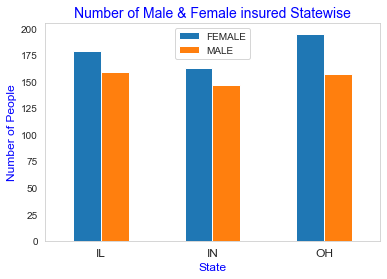

In [31]:
# number of male and female insured
insurance_state = pd.crosstab(insurance_df.policy_state,insurance_df.insured_sex)
insurance_state.plot(kind='bar',grid=False)
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('State',fontsize=12,color='blue')
plt.ylabel('Number of People',fontsize=12,color='blue')
plt.legend(fontsize=10)
plt.title('Number of Male & Female insured Statewise',fontsize=14,color='blue');

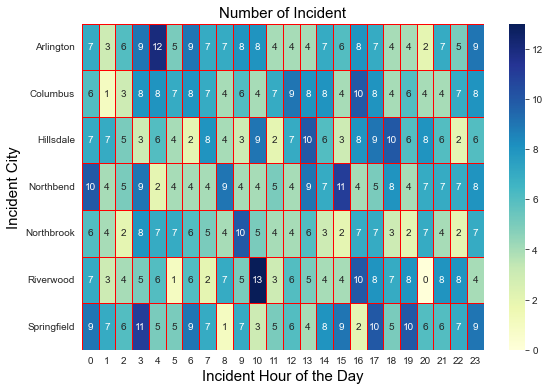

In [51]:
# number of incident per hour in a day in different cities
State_report = pd.crosstab(insurance_df.incident_city,insurance_df.incident_hour_of_the_day)
plt.figure(figsize=(9,6))
sns.heatmap(State_report,fmt="d", annot=True, cmap='YlGnBu',linecolor='Red',linewidths=.5)
plt.title('Number of Incident',fontsize=15,color='black')
plt.xlabel('Incident Hour of the Day', fontsize=15,color='black')
plt.ylabel('Incident City', fontsize=15,color='black');

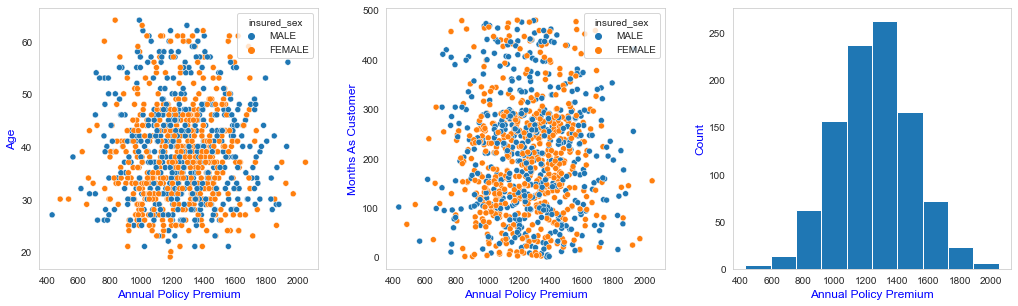

In [38]:
# annual policy premium paid
fig,axes = plt.subplots(1,3,figsize=(15,5))
plt.tight_layout(pad=4)
plt.grid(False)
sns.set_style("whitegrid", {'axes.grid' : False})

axes[0].set_xlabel('Annual Policy Premium',fontsize=12,color='blue')
axes[0].set_ylabel('Age',fontsize=12,color='blue')
sns.scatterplot(x=insurance_df.policy_annual_premium,y=insurance_df.age,hue='insured_sex',data=insurance_df,ax=axes[0]);

axes[1].set_xlabel('Annual Policy Premium',fontsize=12,color='blue')
axes[1].set_ylabel('Months As Customer',fontsize=12,color='blue')
sns.scatterplot(x=insurance_df.policy_annual_premium,y=insurance_df.months_as_customer,hue='insured_sex',data=insurance_df,ax=axes[1]);

axes[2].hist(insurance_df.policy_annual_premium)
axes[2].set_xlabel('Annual Policy Premium',fontsize=12,color='blue')
axes[2].set_ylabel('Count',fontsize=12,color='blue');

In [39]:
# frequency of accident hourly
insurance_df.incident_hour_of_the_day.describe()

count    1000.000000
mean       11.644000
std         6.951373
min         0.000000
25%         6.000000
50%        12.000000
75%        17.000000
max        23.000000
Name: incident_hour_of_the_day, dtype: float64

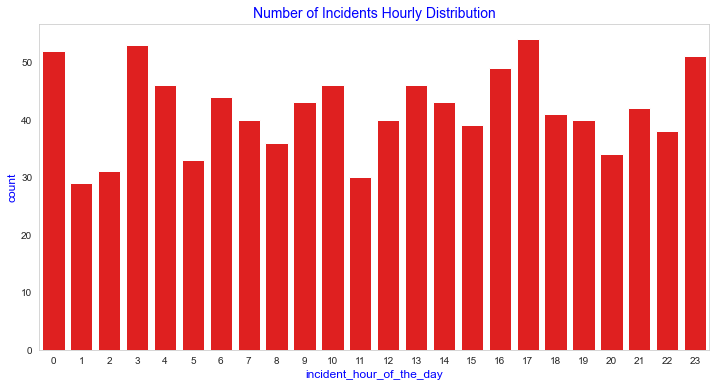

In [52]:
plt.figure(figsize=(12,6))
plt.grid(False)
plt.title('Number of Incidents Hourly Distribution',color='blue',fontsize=14)
plt.xlabel('Incident Hour of the Day',fontsize=12,color='blue')
plt.ylabel(None,color='blue',fontsize=12);
sns.countplot(x=insurance_df.incident_hour_of_the_day,color='red');

In [42]:
insurance_premium = insurance_df.groupby('policy_state')['policy_annual_premium'].mean()
insurance_claim = insurance_df.groupby('incident_state')['total_claim_amount'].mean()
insurance_state = insurance_df.groupby('incident_state')['policy_annual_premium'].mean()

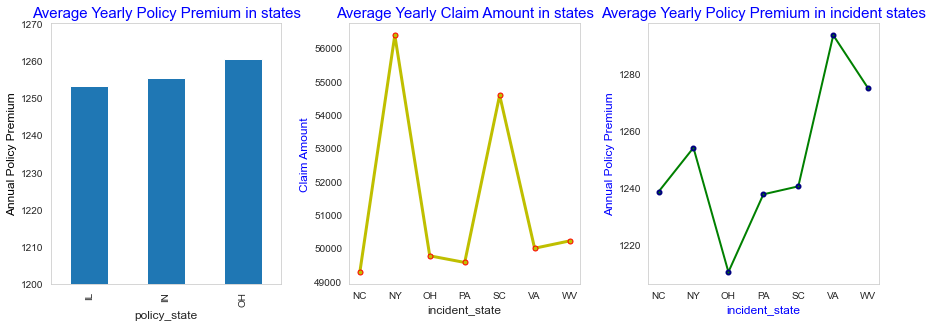

In [45]:
fig,axes = plt.subplots(1,3,figsize=(13,5))
plt.tight_layout(pad=4)
sns.set_style('whitegrid')

axes[0].set_xlabel('Annual Policy Premium',fontsize=12)
axes[0].set_ylabel('Annual Policy Premium',fontsize=12,color='black')
axes[0].set_ylim([1200,1270])
axes[0].grid(False)
axes[0].set_title('Average Yearly Policy Premium in states',fontsize=15,color='blue')
insurance_premium.plot(kind='bar',ax=axes[0],grid=False);

axes[1].set_xlabel('Annual Policy Premium',fontsize=12)
axes[1].set_ylabel('Claim Amount',fontsize=12,color='blue')
axes[1].set_title('Average Yearly Claim Amount in states',fontsize=15,color='blue')
insurance_claim.plot(kind='line',ax=axes[1],marker='.', c='y', ls='-', lw=3, ms=10,mec='red',grid=False)

axes[2].set_xlabel('Annual Policy Premium',fontsize=12,color='blue')
axes[2].set_ylabel('Annual Policy Premium',fontsize=12,color='blue');
axes[2].set_title('Average Yearly Policy Premium in incident states',fontsize=15,color='blue')
insurance_state.plot(kind='line',ax=axes[2],marker='.', c='g', ls='-', lw=2, ms=8, mew=2, mec='navy',grid=False);

In [46]:
# automobile accident
Vehicles_involved = insurance_df.number_of_vehicles_involved.value_counts()
Type_of_collision = insurance_df.collision_type.value_counts()
Incident_Type = insurance_df.incident_type.value_counts()*100/insurance_df.incident_type.count()
Incident_Severity =insurance_df.incident_severity.value_counts()*100/insurance_df.incident_severity.count()


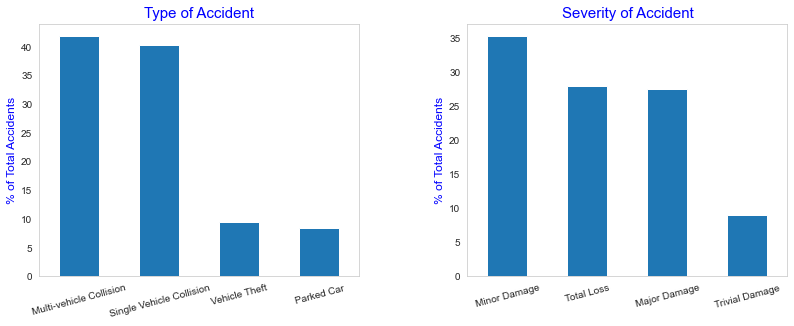

In [47]:
fig,axes = plt.subplots(1,2,figsize=(13,6))
plt.tight_layout(pad=8)

axes[0].set_title('Type of Accident',fontsize=15,color='blue')
Incident_Type.plot(kind='bar',ax=axes[0],grid=False)
xlabels=Incident_Type.index
axes[0].set_xticklabels(xlabels, rotation=15);
axes[0].set_ylabel('% of Total Accidents',fontsize=12,color='blue')

axes[1].set_title('Severity of Accident',fontsize=15,color='blue')
Incident_Severity.plot(kind='bar',ax=axes[1],grid=False);
xlabels=Incident_Severity.index
axes[1].set_xticklabels(xlabels, rotation=15)
axes[1].set_ylabel('% of Total Accidents',fontsize=12,color='blue');

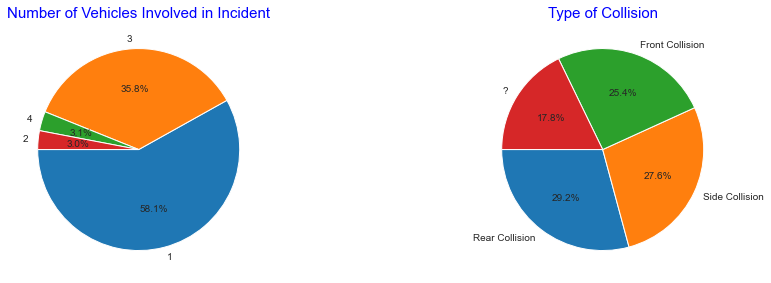

In [53]:
fig,axes = plt.subplots(1,2,figsize=(14,6))
plt.tight_layout(pad=8)

axes[0].set_title('Number of Vehicles Involved in Incident',fontsize=15,color='blue')
axes[0].pie(Vehicles_involved,labels=Vehicles_involved.index,autopct='%1.1f%%',startangle=180)

axes[1].set_title('Type of Collision',fontsize=15,color='blue')
axes[1].pie(Type_of_collision,labels=Type_of_collision.index,autopct='%1.1f%%',startangle=180);

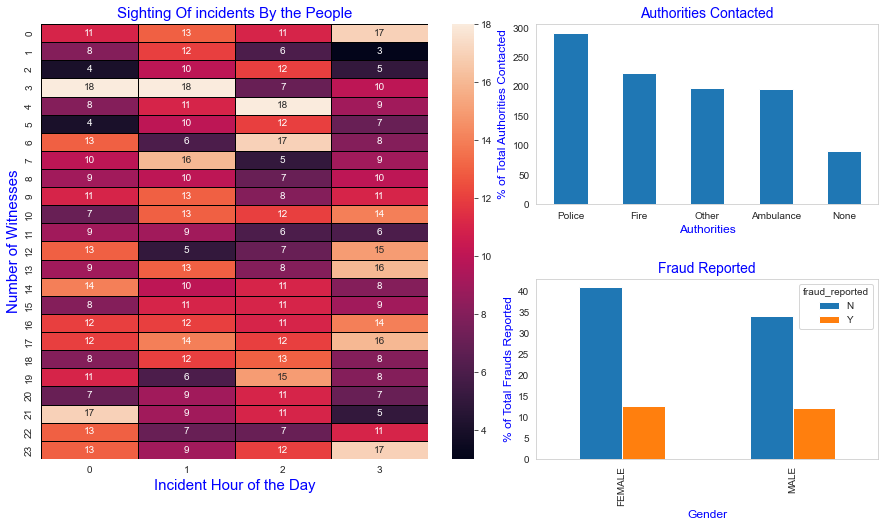

In [54]:
# reporting of iccidents

fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((7, 12), (0, 0), rowspan=7,colspan=7)
ax2 = plt.subplot2grid((7, 12), (0, 7), rowspan=3,colspan=5)
ax3 = plt.subplot2grid((7, 12), (4, 7), rowspan=3,colspan=5)

Accident_witnesses = pd.crosstab(insurance_df.incident_hour_of_the_day,insurance_df.witnesses)
sns.heatmap(Accident_witnesses,fmt="d", annot=True,linecolor='black',linewidths=.5,ax=ax1)
ax1.set_title('Sighting Of incidents By the People',fontsize=15,color='blue')
ax1.set_xlabel('Incident Hour of the Day', fontsize=15,color='blue')
ax1.set_ylabel('Number of Witnesses', fontsize=15,color='blue');

Authorities_contacted = insurance_df.authorities_contacted.value_counts()
Authorities_contacted.plot(kind='bar',grid=False,ax=ax2)
xlabels=Authorities_contacted .index
ax2.set_xticklabels(xlabels, rotation=0);
ax2.set_title('Authorities Contacted',fontsize=14,color='blue')
ax2.set_xlabel("Authorities",fontsize=12,color='blue')
ax2.set_ylabel("% of Total Authorities Contacted",fontsize=12,color='blue');

Reporting_Fraud_Gender = pd.crosstab(insurance_df.insured_sex,insurance_df.fraud_reported,normalize=True)
Reporting_Fraud_Gender_Pct = Reporting_Fraud_Gender*100
Reporting_Fraud_Gender_Pct.plot(kind='bar',grid=False,ax=ax3)
ax3.set_title('Fraud Reported',fontsize=14,color='blue')
ax3.set_xlabel("Gender",fontsize=12,color='blue')
ax3.set_ylabel("% of Total Frauds Reported",fontsize=12,color='blue');

In [50]:
insurance_df.groupby(["policy_state", "insured_sex"])[["months_as_customer","age","policy_annual_premium","total_claim_amount"
]].mean()

months_as_customer        age  \
policy_state insured_sex                                  
IL           FEMALE               197.815642  38.966480   
             MALE                 209.408805  39.515723   
IN           FEMALE               193.386503  37.503067   
             MALE                 219.034014  40.027211   
OH           FEMALE               200.497436  38.425641   
             MALE                 206.573248  39.490446   

                          policy_annual_premium  total_claim_amount  
policy_state insured_sex                                             
IL           FEMALE                 1269.643855        53007.709497  
             MALE                   1234.550629        52660.062893  
IN           FEMALE                 1250.792945        54567.791411  
             MALE                   1260.496871        51276.258503  
OH           FEMALE                 1224.700615        52627.846154  
             MALE                   1304.824459        52267.643312